In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
np.random.seed(42)  # For reproducible results
noise_level = 0.02  # Adjust the noise level as needed

rows = []
for e in range(100):

    for t, f in zip(['train', 'validation'], [0.5, 0.1]):
        row = {}
        row['epoch'] = e + 1
        row['loss'] = 1 / (f * e + 1) + np.random.normal(0, noise_level)
        row['accuracy'] = 1 - (1 / (f * e + 1)) + np.random.normal(0, noise_level)
        row['set'] = t

        rows.append(row)

df = pd.DataFrame(rows)

df.to_csv('loss_plot_data.csv')

In [53]:
df = pd.read_csv('loss_plot_data.csv')

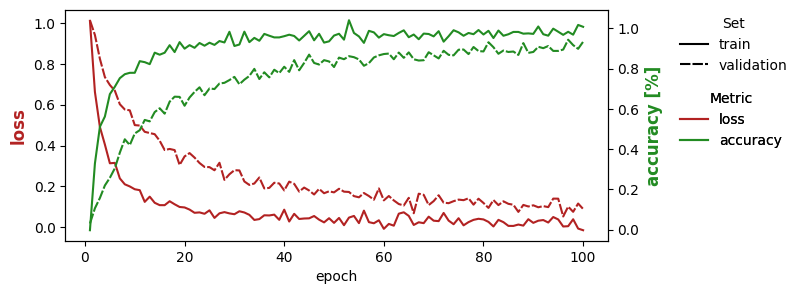

In [71]:
from matplotlib.lines import Line2D

def plot_loss(df): 
    fig, ax = plt.subplots(figsize=(7, 3))
    ax2 = ax.twinx()

    styles = {
        'train': (None, None),
        'validation': (5, 1)
    }

    sns.lineplot(data=df, x='epoch', y='loss', color='firebrick', style='set', dashes=styles, ax=ax, legend=False)
    sns.lineplot(data=df, x='epoch', y='accuracy', color='forestgreen', style='set', dashes=styles, ax=ax2, legend=False)

    ax.set_ylabel('loss', fontsize=12, fontweight='bold', color='firebrick')
    ax2.set_ylabel('accuracy [%]', fontsize=12, fontweight='bold', color='forestgreen')

    legend_elements_set = [
        Line2D([0], [0], color='black', linestyle='-', label='train'),
        Line2D([0], [0], color='black', label='validation')
    ]
    legend_elements_set[1].set_dashes([5, 1])
    legend_elements_metric = [
        Line2D([0], [0], color='firebrick', label='loss'),
        Line2D([0], [0], color='forestgreen', label='accuracy')
    ]

    ax.legend(handles=legend_elements_set, title="Set", loc="center left", bbox_to_anchor=(1.11, 0.85), frameon=False)
    plt.gca().add_artist(plt.legend(handles=legend_elements_metric, title="Metric", loc="upper left", bbox_to_anchor=(1.11, 0.7), frameon=False))

    plt.show()
    plt.close()